### Metrics to check the quality of Machine Learning Models

In [1]:
import  numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,confusion_matrix ,classification_report,f1_score,accuracy_score,make_scorer



In [2]:
df=pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21238,31550.0,-0.972401,0.652863,2.669551,1.391358,-0.986318,-0.083598,0.067155,0.131614,0.211952,...,0.197048,0.633022,-0.127267,0.703985,0.215010,-0.096101,-0.126639,0.110299,43.0,0
68421,52984.0,1.056563,0.135047,0.450158,1.108255,-0.136541,-0.023696,-0.004363,0.065342,-0.324552,...,0.146303,0.386420,-0.103472,0.029922,0.508141,-0.322921,0.029779,0.019617,49.0,0
97659,66319.0,1.568989,-0.944651,-0.070873,-1.763315,-0.728317,0.095268,-0.953282,-0.089752,-2.206720,...,-0.235035,-0.253634,-0.158744,-0.980618,0.578181,-0.145866,0.032400,0.000344,15.0,0
193614,130214.0,-2.567360,-0.398800,0.422644,0.349300,-1.560111,1.225073,0.986748,0.230471,-1.462310,...,-0.462104,-0.341253,-0.420273,0.705276,0.491527,-0.431081,-0.019302,0.179316,370.0,0
5468,5494.0,0.934890,0.606763,0.424614,0.959685,0.101613,-0.893265,0.707978,-0.524007,1.076137,...,-0.059816,0.377196,0.336011,0.592248,-0.955234,0.168309,-0.250721,-0.361626,25.7,0


In [3]:
df.shape

(284807, 31)

In [4]:
X =df.drop(columns =['Class','Time','Amount'])

In [5]:
y=df.iloc[:,-1:]

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
y.sum()

Class    492
dtype: int64

In [8]:
lr=LogisticRegression(class_weight={0:1,1:2})

In [28]:
lr.fit(X,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={0: 1, 1: 2})

In [29]:
predicted_y =lr.predict(X)

In [30]:
predicted_y.sum()

437

In [31]:
grid=GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'class_weight':[{0:1,1: number}for number in range(1,10)]},
    cv=5
)

In [32]:
grid.fit(X,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]})

In [33]:
predicted_y =grid.predict(X)

In [34]:
predicted_y.sum()

476

In [35]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.884604,0.448501,0.011397,0.001357,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998999,0.999315,0.998947,0.999298,0.999017,0.999115,0.000158,9
1,3.714201,0.462090,0.015002,0.005101,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999034,0.999421,0.999017,0.999298,0.999175,0.999189,0.000154,7
2,4.169014,0.266212,0.020604,0.005240,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999052,0.999491,0.998964,0.999421,0.999210,0.999228,0.000204,4
3,4.370200,0.442683,0.025404,0.009266,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.998999,0.999544,0.998982,0.999438,0.999280,0.999249,0.000227,1
4,3.915020,0.309312,0.016398,0.002059,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.998964,0.999526,0.999017,0.999438,0.999280,0.999245,0.000223,3
5,3.593862,0.375636,0.013199,0.001722,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.998964,0.999579,0.998982,0.999438,0.999280,0.999249,0.000244,1
6,3.096161,0.494070,0.012595,0.000488,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.998964,0.999596,0.998912,0.999473,0.999192,0.999228,0.000271,5
7,2.882625,0.150848,0.012200,0.000400,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.998929,0.999649,0.998841,0.999438,0.999192,0.999210,0.000303,6
8,2.793402,0.119619,0.011798,0.001327,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.998894,0.999649,0.998718,0.999368,0.999192,0.999164,0.000331,8


In [36]:
precision_score(y,predicted_y)

0.8109243697478992

In [37]:
recall_score(y,predicted_y)

0.7845528455284553

In [38]:
f1_score(y,predicted_y)

0.7975206611570248

In [39]:
accuracy_score(y,predicted_y)

0.9993118146674765

In [40]:
confusion_matrix(y,predicted_y)

array([[284225,     90],
       [   106,    386]], dtype=int64)

<AxesSubplot:>

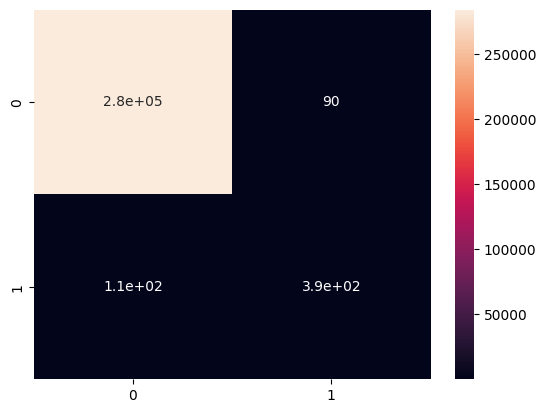

In [41]:
sns.heatmap(confusion_matrix(y,predicted_y),annot=True)

### Metrics to check the quality of Machine Learning Models (Part-4/7)   13/12/2022

In [42]:
print(classification_report(y,predicted_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.81      0.78      0.80       492

    accuracy                           1.00    284807
   macro avg       0.91      0.89      0.90    284807
weighted avg       1.00      1.00      1.00    284807



### video Metrics to check the quality of Machine Learning Models (Part-5/7)

In [35]:
def min_precision_recall(y,predicted_y):
    p =precision_score(y,predicted_y)
    r=recall_score(y,predicted_y)
    return min(p,r)
make_scorer(min_precision_recall,greater_is_better=False)

make_scorer(min_precision_recall, greater_is_better=False)

In [42]:
dummy =make_scorer(min_precision_recall)

In [43]:
??dummy

Signature:      dummy(estimator, X, y_true, sample_weight=None)
Type:           _PredictScorer
String form:    make_scorer(min_precision_recall)
File:           c:\users\lenovo\appdata\roaming\python\python310\site-packages\sklearn\metrics\_scorer.py
Source:        
class _PredictScorer(_BaseScorer):
    def _score(self, method_caller, estimator, X, y_true, sample_weight=None):
        """Evaluate predicted target values for X relative to y_true.

        Parameters
        ----------
        method_caller : callable
            Returns predictions given an estimator, method name, and other
            arguments, potentially caching results.

        estimator : object
            Trained estimator to use for scoring. Must have a `predict`
            method; the output of that is used to compute the score.

        X : {array-like, sparse matrix}
            Test data that will be fed to estimator.predict.

        y_true : array-like
            Gold standard target values for X.

  

In [48]:
def min_precision_recall(estimator, X, y_true, sample_weight=None):
    pred_y = estimator.predict(X)
    p =precision_score(y,predicted_y)
    r=recall_score(y,predicted_y)
    return min(p,r)
    
grid=GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={"class_weight":[{0:1,1: number} for number in range(1,10)]},
    cv=5,
    scoring={"precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
    "minum_of_both":min_precision_recall
    },

    refit="minum_of_both"
)

In [49]:
grid.fit(X,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='minum_of_both',
             scoring={'minum_of_both': <function min_precision_recall at 0x000001F104E2AC20>,
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [50]:
predicted_y =grid.predict(X)

In [51]:
df_result =pd.DataFrame(grid.cv_results_)

In [52]:
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_recall,rank_test_recall,split0_test_minum_of_both,split1_test_minum_of_both,split2_test_minum_of_both,split3_test_minum_of_both,split4_test_minum_of_both,mean_test_minum_of_both,std_test_minum_of_both,rank_test_minum_of_both
0,5.189626,1.298760,0.451199,0.122423,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.694444,0.968750,0.913043,0.881579,...,0.119921,9,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
1,4.030758,0.564678,0.411401,0.067682,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.700000,0.971429,0.818182,0.815217,...,0.084528,8,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
2,5.196443,1.214914,0.655368,0.529332,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.695652,0.960526,0.729412,0.828283,...,0.075756,7,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
3,3.770462,0.367031,0.355805,0.025976,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.677966,0.962025,0.717391,0.830000,...,0.060979,6,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
4,3.872170,0.633561,0.440615,0.123368,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.666667,0.950000,0.718750,0.830000,...,0.052519,5,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
5,5.178642,1.071202,0.809270,0.324132,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.666667,0.951807,0.704082,0.823529,...,0.056381,4,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
6,4.393828,0.830081,0.445119,0.044808,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.666667,0.952381,0.676471,0.833333,...,0.060037,3,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
7,3.227801,0.161100,0.383598,0.070019,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.658333,0.954023,0.650943,0.817308,...,0.061346,2,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1
8,2.934199,0.098972,0.336002,0.030067,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.647541,0.954023,0.610619,0.787037,...,0.058230,1,0.801619,0.801619,0.801619,0.801619,0.801619,0.801619,0.0,1


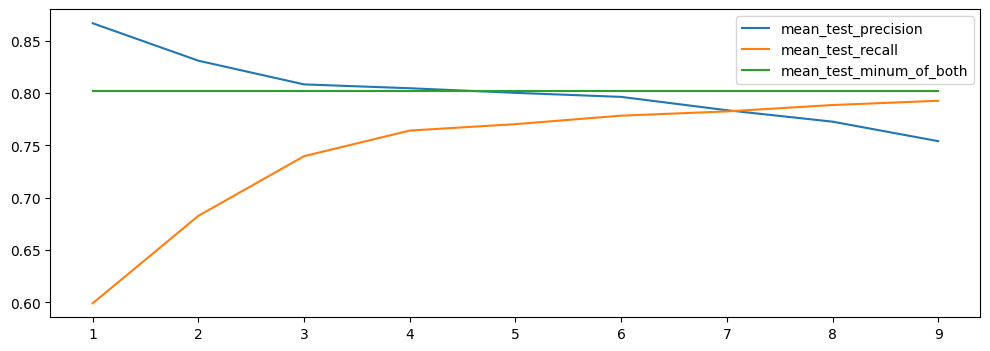

In [53]:
plt.figure(figsize=(12,4))
for i in['mean_test_precision','mean_test_recall','mean_test_minum_of_both']:
    plt.plot([ j[1] for j in df_result['param_class_weight']],df_result[i],
    label=i
    )
plt.legend()